# Loan Fraud detection
### STEPS:
1. Load data in pandas DF
2. Drop unnecessary columns
3. Handle missing value
4. encoding for non-numerical values
5. Scale data (normalisation & Standardisation)
6. Test_train_split with maintaining the ratio of frauds in both test set & train set
7. Undersample the majority (or oversample the minority)
8. Use KNN or Random Forest or XGBoost for model training
9. Calculate score (accuracy, precision, recall, f1) & focus on recall

read more: [kaggle](https://www.kaggle.com/code/bansodesandeep/loan-default-prediction)

python: python3.13

In [180]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [181]:
df = pd.read_csv("Dataset.csv", low_memory=False)
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655054,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631354537,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355638717,0.2021,674.0,1.0,0


In [182]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [183]:
df.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [185]:
df.count()

ID                            121856
Client_Income                 118249
Car_Owned                     118275
Bike_Owned                    118232
Active_Loan                   118221
House_Own                     118195
Child_Count                   118218
Credit_Amount                 118224
Loan_Annuity                  117044
Accompany_Client              120110
Client_Income_Type            118155
Client_Education              118211
Client_Marital_Status         118383
Client_Gender                 119443
Loan_Contract_Type            118205
Client_Housing_Type           118169
Population_Region_Relative    116999
Age_Days                      118256
Employed_Days                 118207
Registration_Days             118242
ID_Days                       115888
Own_House_Age                  41761
Mobile_Tag                    121856
Homephone_Tag                 121856
Workphone_Working             121856
Client_Occupation              80421
Client_Family_Members         119446
C

In [186]:
df.notnull().sum()

ID                            121856
Client_Income                 118249
Car_Owned                     118275
Bike_Owned                    118232
Active_Loan                   118221
House_Own                     118195
Child_Count                   118218
Credit_Amount                 118224
Loan_Annuity                  117044
Accompany_Client              120110
Client_Income_Type            118155
Client_Education              118211
Client_Marital_Status         118383
Client_Gender                 119443
Loan_Contract_Type            118205
Client_Housing_Type           118169
Population_Region_Relative    116999
Age_Days                      118256
Employed_Days                 118207
Registration_Days             118242
ID_Days                       115888
Own_House_Age                  41761
Mobile_Tag                    121856
Homephone_Tag                 121856
Workphone_Working             121856
Client_Occupation              80421
Client_Family_Members         119446
C

In [187]:
(df.notnull().sum() / df.shape[0])*100

ID                            100.000000
Client_Income                  97.039949
Car_Owned                      97.061285
Bike_Owned                     97.025998
Active_Loan                    97.016971
House_Own                      96.995634
Child_Count                    97.014509
Credit_Amount                  97.019433
Loan_Annuity                   96.051077
Accompany_Client               98.567161
Client_Income_Type             96.962809
Client_Education               97.008764
Client_Marital_Status          97.149915
Client_Gender                  98.019794
Loan_Contract_Type             97.003841
Client_Housing_Type            96.974298
Population_Region_Relative     96.014148
Age_Days                       97.045693
Employed_Days                  97.005482
Registration_Days              97.034204
ID_Days                        95.102416
Own_House_Age                  34.270779
Mobile_Tag                    100.000000
Homephone_Tag                 100.000000
Workphone_Workin

# % of missing values

In [188]:
missing_df = (df.isna().sum() / df.shape[0])*100
missing_df = missing_df[missing_df.iloc[:] != 0]
missing_df.sort_values(ascending=False, inplace=True)
missing_df

Own_House_Age                 65.729221
Score_Source_1                56.488806
Social_Circle_Default         50.820641
Client_Occupation             34.003250
Score_Source_3                22.092470
Credit_Bureau                 15.214680
ID_Days                        4.897584
Score_Source_2                 4.666163
Population_Region_Relative     3.985852
Loan_Annuity                   3.948923
Client_Income_Type             3.037191
Client_Housing_Type            3.025702
Phone_Change                   3.006828
Application_Process_Hour       3.006007
House_Own                      3.004366
Loan_Contract_Type             2.996159
Employed_Days                  2.994518
Client_Education               2.991236
Child_Count                    2.985491
Active_Loan                    2.983029
Credit_Amount                  2.980567
Bike_Owned                     2.974002
Registration_Days              2.965796
Type_Organization              2.961692
Client_Income                  2.960051


# plot null value distribution


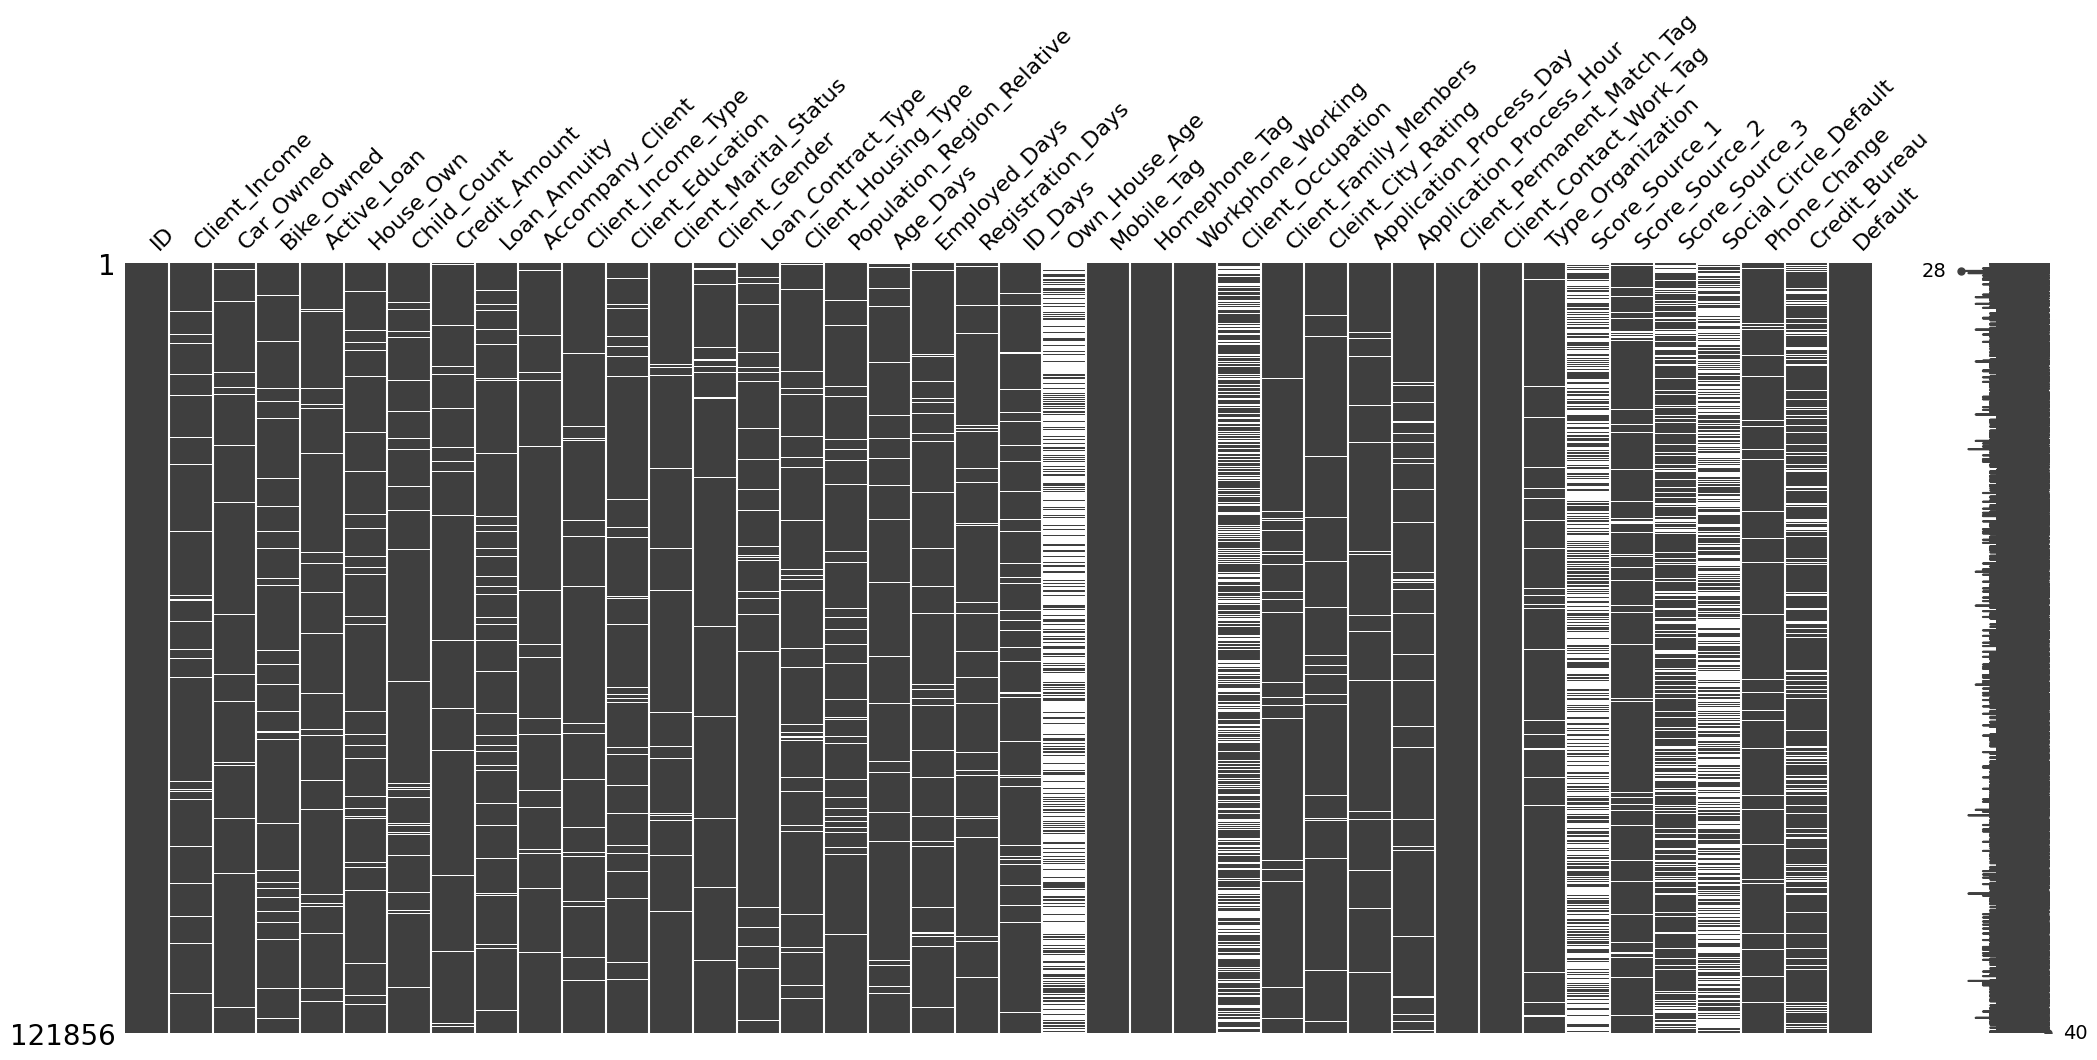

In [189]:
msno.matrix(df)
plt.show()

# check default count to see data imbalance

<Axes: xlabel='Default', ylabel='count'>

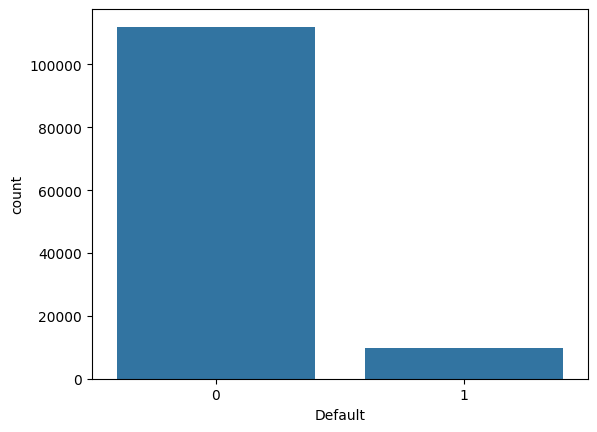

In [190]:
sns.countplot(data=df, x="Default")

<Axes: xlabel='Own_House_Age', ylabel='Count'>

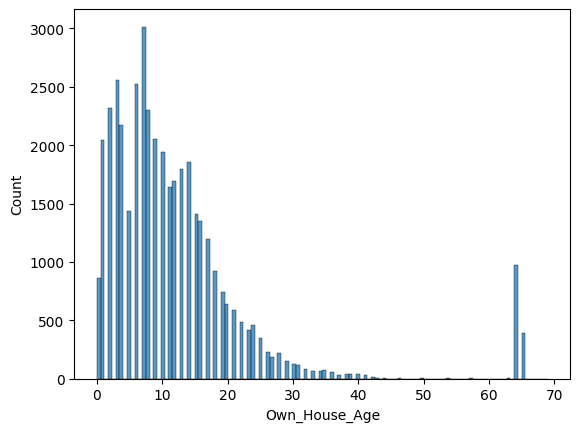

In [191]:
sns.histplot(df["Own_House_Age"])

<Axes: xlabel='Client_Income', ylabel='Count'>

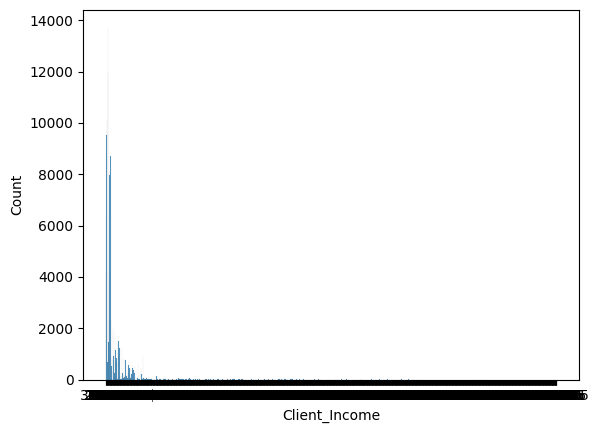

In [192]:
sns.histplot(df["Client_Income"])

# impute null vales having nulls in column > 2%

In [193]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[[
    "Own_House_Age",
    "Score_Source_1",
    "Social_Circle_Default",
    "Client_Occupation",
    "Score_Source_3",
    "Credit_Bureau",
    "ID_Days",
    "Score_Source_2",
    "Population_Region_Relative",
    "Loan_Annuity",
    "Client_Income_Type",
    "Client_Housing_Type",
    "Phone_Change",
    "Application_Process_Hour",
    "House_Own",
    "Loan_Contract_Type",
    "Employed_Days",
    "Client_Education",
    "Child_Count",
    "Active_Loan",
    "Credit_Amount",
    "Bike_Owned",
    "Registration_Days",
    "Type_Organization",
    "Client_Income",
    "Age_Days",
    "Car_Owned",
    "Client_Marital_Status"
]] = impute.fit_transform(df[[
    "Own_House_Age",
    "Score_Source_1",
    "Social_Circle_Default",
    "Client_Occupation",
    "Score_Source_3",
    "Credit_Bureau",
    "ID_Days",
    "Score_Source_2",
    "Population_Region_Relative",
    "Loan_Annuity",
    "Client_Income_Type",
    "Client_Housing_Type",
    "Phone_Change",
    "Application_Process_Hour",
    "House_Own",
    "Loan_Contract_Type",
    "Employed_Days",
    "Client_Education",
    "Child_Count",
    "Active_Loan",
    "Credit_Amount",
    "Bike_Owned",
    "Registration_Days",
    "Type_Organization",
    "Client_Income",
    "Age_Days",
    "Car_Owned",
    "Client_Marital_Status"
]])

In [194]:
df.count()

ID                            121856
Client_Income                 121856
Car_Owned                     121856
Bike_Owned                    121856
Active_Loan                   121856
House_Own                     121856
Child_Count                   121856
Credit_Amount                 121856
Loan_Annuity                  121856
Accompany_Client              120110
Client_Income_Type            121856
Client_Education              121856
Client_Marital_Status         121856
Client_Gender                 119443
Loan_Contract_Type            121856
Client_Housing_Type           121856
Population_Region_Relative    121856
Age_Days                      121856
Employed_Days                 121856
Registration_Days             121856
ID_Days                       121856
Own_House_Age                 121856
Mobile_Tag                    121856
Homephone_Tag                 121856
Workphone_Working             121856
Client_Occupation             121856
Client_Family_Members         119446
C

In [195]:
missing_df = (df.isna().sum() / df.shape[0])*100
missing_df

ID                            0.000000
Client_Income                 0.000000
Car_Owned                     0.000000
Bike_Owned                    0.000000
Active_Loan                   0.000000
House_Own                     0.000000
Child_Count                   0.000000
Credit_Amount                 0.000000
Loan_Annuity                  0.000000
Accompany_Client              1.432839
Client_Income_Type            0.000000
Client_Education              0.000000
Client_Marital_Status         0.000000
Client_Gender                 1.980206
Loan_Contract_Type            0.000000
Client_Housing_Type           0.000000
Population_Region_Relative    0.000000
Age_Days                      0.000000
Employed_Days                 0.000000
Registration_Days             0.000000
ID_Days                       0.000000
Own_House_Age                 0.000000
Mobile_Tag                    0.000000
Homephone_Tag                 0.000000
Workphone_Working             0.000000
Client_Occupation        

# drop rows having <2% missing values

In [196]:
df.dropna(inplace = True)
missing_df = df.isna().sum()

In [197]:
df.count()

ID                            110876
Client_Income                 110876
Car_Owned                     110876
Bike_Owned                    110876
Active_Loan                   110876
House_Own                     110876
Child_Count                   110876
Credit_Amount                 110876
Loan_Annuity                  110876
Accompany_Client              110876
Client_Income_Type            110876
Client_Education              110876
Client_Marital_Status         110876
Client_Gender                 110876
Loan_Contract_Type            110876
Client_Housing_Type           110876
Population_Region_Relative    110876
Age_Days                      110876
Employed_Days                 110876
Registration_Days             110876
ID_Days                       110876
Own_House_Age                 110876
Mobile_Tag                    110876
Homephone_Tag                 110876
Workphone_Working             110876
Client_Occupation             110876
Client_Family_Members         110876
C

# label encoding of object datatype

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110876 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          110876 non-null  int64  
 1   Client_Income               110876 non-null  object 
 2   Car_Owned                   110876 non-null  object 
 3   Bike_Owned                  110876 non-null  object 
 4   Active_Loan                 110876 non-null  object 
 5   House_Own                   110876 non-null  object 
 6   Child_Count                 110876 non-null  object 
 7   Credit_Amount               110876 non-null  object 
 8   Loan_Annuity                110876 non-null  object 
 9   Accompany_Client            110876 non-null  object 
 10  Client_Income_Type          110876 non-null  object 
 11  Client_Education            110876 non-null  object 
 12  Client_Marital_Status       110876 non-null  object 
 13  Client_Gender      

In [199]:
objList = df.select_dtypes(include = "object").columns
objList

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Own_House_Age', 'Client_Occupation',
       'Application_Process_Hour', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_1',
       'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default',
       'Phone_Change', 'Credit_Bureau'],
      dtype='object')

In [200]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 110876 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          110876 non-null  int64  
 1   Client_Income               110876 non-null  int64  
 2   Car_Owned                   110876 non-null  int64  
 3   Bike_Owned                  110876 non-null  int64  
 4   Active_Loan                 110876 non-null  int64  
 5   House_Own                   110876 non-null  int64  
 6   Child_Count                 110876 non-null  int64  
 7   Credit_Amount               110876 non-null  int64  
 8   Loan_Annuity                110876 non-null  int64  
 9   Accompany_Client            110876 non-null  int64  
 10  Client_Income_Type          110876 non-null  int64  
 11  Client_Education            110876 non-null  int64  
 12  Client_Marital_Status       110876 non-null  int64  
 13  Client_Gender      

In [201]:
df

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,953,0,0,1,0,0,2972,5096,1,...,1,1,42,24162,25145,649,75,3166,0,0
1,12138936,452,1,0,1,1,0,1110,1815,1,...,1,1,11,23886,7830,649,418,0,0,0
2,12181264,383,0,0,1,0,1,2923,3830,1,...,1,1,42,7070,32804,401,364,1968,0,0
3,12188929,292,0,0,1,1,0,2732,2803,1,...,1,1,57,7070,4499,574,418,781,14,0
4,12133385,691,1,0,1,0,5,823,5346,1,...,1,1,5,20640,12260,417,1038,3215,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,636,0,0,0,1,0,212,4609,6,...,1,0,4,7070,6032,293,259,0,1,1
121852,12173765,292,0,1,1,0,0,120,5037,1,...,1,1,42,7070,16646,447,418,2898,0,0
121853,12103937,1040,0,1,0,1,1,2776,4245,1,...,0,0,50,2553,1485,649,418,0,0,0
121854,12170623,742,1,1,0,1,0,2434,3687,1,...,1,1,5,3046,3329,156,520,0,11,0


# scale the data to normalize (mean = 0) & standardise (SD=1)

In [202]:
# scaling the data after dropping target variable
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame(scale(df.drop("Default" , axis = 1)))
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.524461,1.430641,-0.705993,-0.689945,1.031262,-1.535958,-0.456437,0.781367,0.204996,-0.472366,...,0.068642,0.289153,0.467380,0.649137,1.115801,-0.384373,0.888338,-1.395819,1.294227,-0.873603
1,-0.626062,-0.078582,1.416445,-0.689945,1.031262,0.651060,-0.456437,-1.043647,-0.887784,-0.472366,...,-0.918480,0.289153,0.467380,-0.856127,1.088567,-1.359013,0.888338,-0.227451,-1.208326,-0.873603
2,0.577561,-0.286439,-0.705993,-0.689945,1.031262,-1.535958,0.197268,0.733340,-0.216662,-0.472366,...,-0.918480,0.289153,0.467380,0.649137,-0.570751,0.046742,-1.037364,-0.411392,0.347272,-0.873603
3,0.795520,-0.560569,-0.705993,-0.689945,1.031262,0.651060,-0.456437,0.546134,-0.558718,-0.472366,...,-0.213393,0.289153,0.467380,1.377491,-0.570751,-1.546511,0.305968,-0.227451,-0.590987,1.214777
4,-0.783908,0.641387,1.416445,-0.689945,1.031262,-1.535958,2.812088,-1.324946,0.288262,-0.472366,...,-0.918480,0.289153,0.467380,-1.147469,0.768268,-1.109654,-0.913125,1.884469,1.332959,-0.724433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110871,1.329683,0.475704,-0.705993,-0.689945,-0.969686,0.651060,-0.456437,-1.923809,0.042794,2.290182,...,-0.072376,0.289153,-2.139585,-1.196026,-0.570751,-1.460220,-1.875976,-0.769056,-1.208326,-0.724433
110872,0.364323,-0.560569,-0.705993,1.449390,1.031262,-1.535958,-0.456437,-2.013982,0.185345,-0.472366,...,-0.636445,0.289153,0.467380,0.649137,-0.570751,-0.862771,-0.680177,-0.227451,1.082387,-0.873603
110873,-1.621280,1.692721,-0.705993,1.449390,-0.969686,0.651060,0.197268,0.589260,-0.078441,-0.472366,...,-0.777462,-3.458377,-2.139585,1.037593,-1.016466,-1.716165,0.888338,-0.227451,-1.208326,-0.873603
110874,0.274978,0.795020,1.416445,1.449390,-0.969686,0.651060,-0.456437,0.254053,-0.264290,-0.472366,...,-0.636445,0.289153,0.467380,-1.147469,-0.967819,-1.612368,-2.939771,0.119994,-1.208326,0.767267


In [203]:
Y = df["Default"]
Y

0         0
1         0
2         0
3         0
4         0
         ..
121851    1
121852    0
121853    0
121854    0
121855    0
Name: Default, Length: 110876, dtype: int64

# test train split

<Axes: xlabel='Default', ylabel='count'>

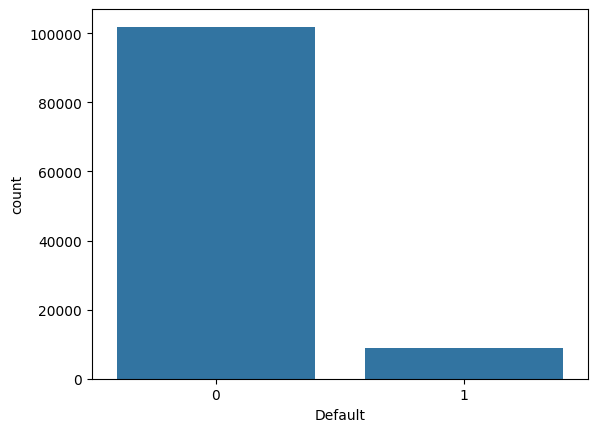

In [204]:
sns.countplot(data=df, x="Default")


In [205]:
df['Default'].value_counts()

Default
0    101917
1      8959
Name: count, dtype: int64

XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

In [141]:
!brew install libomp

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:20fa657858e44a4b39171d6e4111f8a9716eb62a78ebbd1491d94f90bb7b830a
######################################################################### 100.0%#############################                     74.8%
==> Pouring portable-ruby-3.4.5.arm64_big_sur.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
abpoa: SIMD-based C library for fast partial order alignment using adaptive band
act_runner: Action runner for Gitea based on Gitea's fork of act
add-determinism: Build postprocessor to reset metadata fields for build reproducibility
addlicense: Scan directories recursively to ensure source files have license headers
addons-linter: Firefox Add-ons linter, written i

In [206]:
import xgboost as xgb

In [207]:

# Handle potential class imbalance by calculating scale_pos_weight
# This is crucial in fraud detection where fraudulent cases are rare.
scale_pos_weight = (len(Y) - np.sum(Y)) / np.sum(Y)
scale_pos_weight

np.float64(11.375934814153366)

# test train split

In [208]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.15, random_state=42, stratify=Y)
#stratify to ensure that the proportions of different classes in the target variable are maintained in both the training and testing sets.

len(X_train), len(X_test), len(y_train), len(y_test)

(94244, 16632, 94244, 16632)

In [209]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
87560,1.475245,1.840330,1.416445,1.449390,1.031262,0.651060,3.465793,0.968573,-0.631659,-0.472366,...,-0.918480,0.289153,0.467380,0.649137,1.352127,0.388978,-1.177133,-0.227451,1.477610,0.767267
93840,-0.294787,-0.876873,1.416445,-0.689945,-0.969686,0.651060,2.812088,1.427276,0.722909,-0.472366,...,-0.213393,0.289153,-2.139585,0.649137,-0.570751,0.566231,0.888338,-0.227451,-1.208326,0.767267
105730,-1.420268,-0.876873,1.416445,-0.689945,-0.969686,0.651060,0.197268,-0.981898,1.843333,-0.472366,...,-0.495428,0.289153,0.467380,0.503466,1.142246,0.401474,-2.357401,0.010992,-0.855787,0.767267
21546,1.536609,-1.238363,-0.705993,1.449390,-0.969686,-1.535958,-0.456437,-0.461446,-0.678621,-0.472366,...,-0.495428,0.289153,0.467380,-1.293140,-0.570751,-0.078050,-0.315226,-0.155918,1.455478,-0.873603
92537,1.237580,1.840330,-0.705993,1.449390,-0.969686,0.651060,2.812088,-1.840498,2.017192,-0.472366,...,-0.495428,0.289153,0.467380,-1.147469,-0.570751,0.990254,0.173965,-0.227451,1.532151,-0.724433


In [210]:
y_train.sample(3, random_state=3)

46036     0
111330    0
41272     0
Name: Default, dtype: int64

In [211]:
y_test.sample(10, random_state=1)

55267     0
34668     0
11852     0
73921     0
47811     0
68738     0
86059     0
86094     0
119012    0
49938     0
Name: Default, dtype: int64

In [212]:
len(y_test)/y_test.sum()  #ratio of default = 0 and 1 is maintained

np.float64(12.375)

In [219]:
# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='aucpr',          # Evaluation metric, AUC-PR is good for imbalanced data
    n_estimators=50,             # Number of boosting rounds
    learning_rate=0.1,            # Step size shrinkage to prevent overfitting
    max_depth=5,                  # Maximum depth of a tree
    subsample=0.8,                # Subsample ratio of the training instance
    colsample_bytree=0.8,         # Subsample ratio of columns when constructing each tree
    scale_pos_weight=25, # Handles class imbalance  (also change & see the recall performance accordingly) link: https://xgboosting.com/xgboost-tune-scale_pos_weight-parameter/
    random_state=42               # For reproducibility
)

# Train the model
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'aucpr'


In [220]:
y_pred = xgb_model.predict(X_test)

from sklearn.metrics import confusion_matrix
print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


XGBoost Confusion Matrix:
[[ 5171 10117]
 [  138  1206]]


In [221]:
# Evaluate the model (focus on recall)
from  sklearn.metrics import classification_report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.34      0.50     15288
           1       0.11      0.90      0.19      1344

    accuracy                           0.38     16632
   macro avg       0.54      0.62      0.35     16632
weighted avg       0.90      0.38      0.48     16632



In [223]:
from sklearn.metrics import roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1] # Probabilities for ROC-AUC - The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings, while the AUC is the Area Under this curve. An AUC of 1.0 represents a perfect model, while an AUC of 0.5 indicates performance no better than random guessing.  

print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")



ROC AUC Score: 0.7385
